# Example 1

This example shows how to get started with very simple data.

* load data:
    * 2 segments, 2 containers, 1 site, 0 transfers
    * daily segment data with 1 parameter (mortality_count)
    * daily cage data with 1 parameter (temperature)
* load segment data 
  * map columns
  * present plot
* map cage data to segments
  * map columns
  * present plot

In [9]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from pathlib import Path
from aqua_tracekit import SdtModel, SdtSchema
import pandas as pd

Instanciate the model, load containers and segments.

In [10]:
base_path = Path("data")
model = SdtModel(base_path=str(base_path.resolve()))

pd_containers = model.load_containers("containers.csv")
pd_segments = model.load_segments("segments.csv")

In [11]:
pd_containers.head(11)

container_id,ContainerName,OrgUnitId
str,str,str
"""C1""","""Cage 1""","""S1"""
"""C2""","""Cage 2""","""S1"""


In [12]:
pd_segments.head(11)

segment_id,container_id,start_time,end_time,segmentName
str,str,datetime[μs],datetime[μs],str
"""P1""","""C1""",2025-01-01 12:00:00,2025-01-10 18:00:00,"""Fishgroup P1"""
"""P2""","""C2""",2025-01-05 15:00:00,2025-01-10 19:00:00,"""Fishgroup P2"""


Load a timeseries related directly to fish groups (segment).

The example file has daily mortality counts per segment


In [13]:
df_mortality = model.load_segment_timeseries("mortality.csv")
df_mortality = model.parse_float(df_mortality, "MortalityCount")

df_mortality.head(11)

segment_id,date_time,MortalityCount
str,datetime[μs],f64
"""P1""",2025-01-01 16:00:00,4.0
"""P1""",2025-01-02 16:00:00,3.0
"""P1""",2025-01-03 16:00:00,4.0
"""P1""",2025-01-04 16:00:00,3.0
"""P1""",2025-01-05 16:00:00,4.0
…,…,…
"""P1""",2025-01-07 16:00:00,4.0
"""P1""",2025-01-08 16:00:00,3.0
"""P1""",2025-01-09 16:00:00,4.0


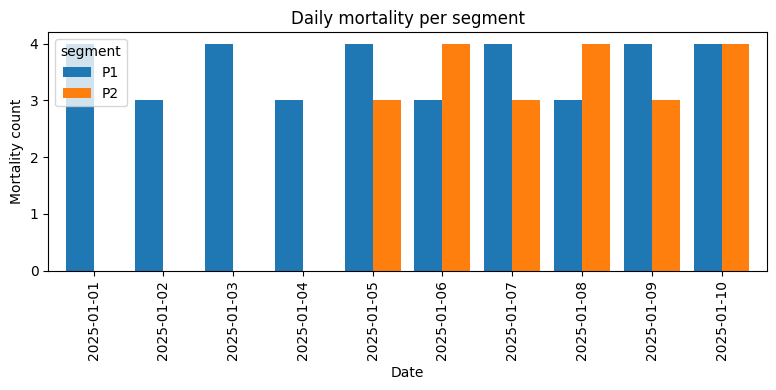

In [14]:

# Pivot to wide form: one column per segment
pivot = (
    df_mortality
    .pivot(
        index= SdtSchema.TimeSeries.DATE_TIME, 
        on=SdtSchema.Segment.SEGMENT_ID, 
        values="MortalityCount")
    .sort(SdtSchema.TimeSeries.DATE_TIME)
    .to_pandas()
)

# Use date_time as index for the x-axis
pivot = pivot.set_index(SdtSchema.TimeSeries.DATE_TIME)

# Format the index for readable labels
pivot.index = pd.DatetimeIndex(pivot.index).strftime("%Y-%m-%d")

pivot.plot(kind="bar", figsize=(8,4), width=0.8)
plt.title("Daily mortality per segment")
plt.xlabel("Date")
plt.ylabel("Mortality count")
plt.legend(title="segment")
plt.tight_layout()
plt.show()

Load a timeseries related to container.

The example file has daily temperature per container.

In [15]:


pd_temperature = model.load_container_timeseries("temperature.csv")
pd_temperature = model.parse_float(pd_temperature, "Temperature")
pd_temperature.head(11)

container_id,date_time,Temperature
str,datetime[μs],f64
"""C1""",2025-01-01 16:00:00,11.0
"""C1""",2025-01-02 16:00:00,12.0
"""C1""",2025-01-03 16:00:00,11.0
"""C1""",2025-01-04 16:00:00,12.0
"""C1""",2025-01-05 16:00:00,11.0
…,…,…
"""C1""",2025-01-07 16:00:00,13.0
"""C1""",2025-01-08 16:00:00,12.0
"""C1""",2025-01-09 16:00:00,11.0


The container data can be mapped to segments.

When we loaded the data, container_id_column and datetime_column was specified. 

This makes it possible for the model to look up segments, and map the data.

In [16]:
df_pop_temps = model.map_container_data_to_segments(pd_temperature, include_unmatched=False, allow_multiple=False)
df_pop_temps.head(20)

container_id,date_time,Temperature,segment_id
str,datetime[μs],f64,str
"""C1""",2025-01-01 16:00:00,11.0,"""P1"""
"""C1""",2025-01-02 16:00:00,12.0,"""P1"""
"""C1""",2025-01-03 16:00:00,11.0,"""P1"""
"""C1""",2025-01-04 16:00:00,12.0,"""P1"""
"""C1""",2025-01-05 16:00:00,11.0,"""P1"""
…,…,…,…
"""C2""",2025-01-06 16:00:00,13.0,"""P2"""
"""C2""",2025-01-07 16:00:00,14.0,"""P2"""
"""C2""",2025-01-08 16:00:00,12.0,"""P2"""


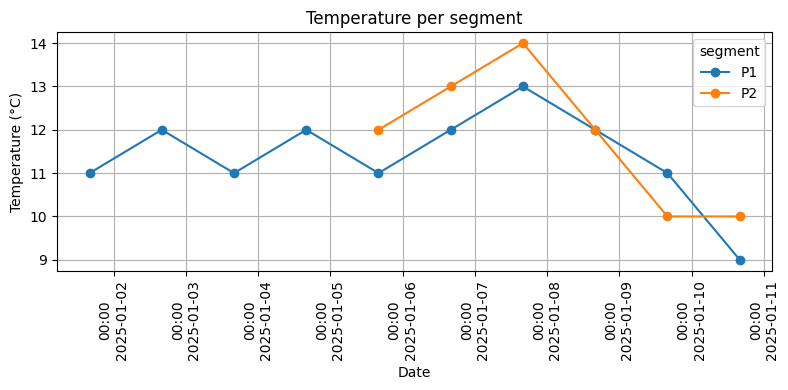

In [18]:
pd_pop_temps = df_pop_temps.to_pandas()

plt.figure(figsize=(8,4))
for pop, sub in pd_pop_temps.groupby(SdtSchema.Segment.SEGMENT_ID):
    plt.plot(sub[SdtSchema.TimeSeries.DATE_TIME], sub["Temperature"], marker="o", label=pop)

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%Y-%m-%d'))
plt.xticks(rotation=90)

plt.title("Temperature per segment")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend(title="segment")
plt.grid(True)
plt.tight_layout()
plt.show()